In [10]:
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
ingr_path = 'data/flavor_network_data/ingr_comp/ingr_info.tsv'
ingr_tsv = pd.read_csv(ingr_path, delimiter='\t')

ingr_df = pd.DataFrame(data = ingr_tsv)
ingr_columns = ['ingredient_id', 'ingredient_name', 'ingredient_category']
ingr_df.columns = ingr_columns

In [12]:
sample_recipe = pd.read_csv('data/sample.csv')

In [13]:
sample_recipe = pd.DataFrame(sample_recipe)

sample_recipe['id'] = sample_recipe.index

sample_recipe.drop("Unnamed: 0", axis=1, inplace=True)


# Function to clean ingredient strings
def clean_ingredient(ingredient):
    # Remove special characters and replace spaces with underscores, convert to lowercase
    cleaned = re.sub(r'[^a-zA-Z0-9\s]', '', ingredient).lower().replace(' ', '_')
    return cleaned.strip()


# Function to process and clean the NER column
def process_and_clean_ner_column(ner_list):
    try:
        # Evaluate the string to a list if necessary
        if isinstance(ner_list, str):
            ner_list = eval(ner_list)
        # Ensure ner_list is actually a list
        if isinstance(ner_list, list):
            # Clean each ingredient in the list
            cleaned_ingredients = [clean_ingredient(ingredient) for ingredient in ner_list]
            return cleaned_ingredients
        else:
            return ner_list
    except Exception as e:
        print(f"Error processing list: {e}")
        return ner_list  # Return the original list if there's an error



In [14]:
sample_recipe['NER'] = sample_recipe['NER'].apply(process_and_clean_ner_column)
sample_recipe
sample_recipe.NER = sample_recipe.NER.astype(str)
ingr_mapping_df = ingr_df.copy()
ingr_mapping_df['ingredient_name'] = ingr_mapping_df['ingredient_name'].astype(str)
ingr_mapping_df['ingredient_id'] = ingr_mapping_df['ingredient_id'].astype(str)
ingr_mapping_df
ingredient_id_list = ingr_mapping_df['ingredient_id'].unique()
# Create a DataFrame to hold the new columns with initial values set to 0
new_columns_ingr_df = pd.DataFrame(0, index=ingr_mapping_df.index, columns=ingredient_id_list)

# Concatenate the new columns to ingr_small
sample_recipe = pd.concat([sample_recipe, new_columns_ingr_df], axis=1)
sample_recipe

,NER,id,0,1,2,3,4,5,6,7,...,1520,1521,1522,1523,1524,1525,1526,1527,1528,1529
0,"['flank_steak', 'green_onions', 'red_wine', 's...",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"['rosemary', 'thyme', 'bay_leaves', 'paprika',...",1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"['carrots', 'butter', 'brown_sugar', 'lemon_ri...",2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"['flour', 'salt', 'baking_powder', 'sugar', 'c...",3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"['thin_pretzels', 'margarine']",4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,"['rolled_oats', 'fresh_orange_juice', 'milk', ...",9995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,"['summer', 'orange_marmalade', 'shredded_cocon...",9996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,"['ground_beef', 'tomatoes', 'longgrain_white_r...",9997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,"['butternut', 'russet_potatoes', 'fingerling_p...",9998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


                                                 NER  id    0    1    2    3  \
0  ['flank_steak', 'green_onions', 'red_wine', 's...   0  0.0  0.0  0.0  0.0   
1  ['rosemary', 'thyme', 'bay_leaves', 'paprika',...   1  0.0  0.0  0.0  0.0   
2  ['carrots', 'butter', 'brown_sugar', 'lemon_ri...   2  0.0  0.0  0.0  0.0   
3  ['flour', 'salt', 'baking_powder', 'sugar', 'c...   3  0.0  0.0  0.0  0.0   
4                     ['thin_pretzels', 'margarine']   4  0.0  0.0  0.0  0.0   

     4    5    6    7  ...  1520  1521  1522  1523  1524  1525  1526  1527  \
0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   1528  1529  
0   0.0   0.0  
1   0.0   0.0  
2 

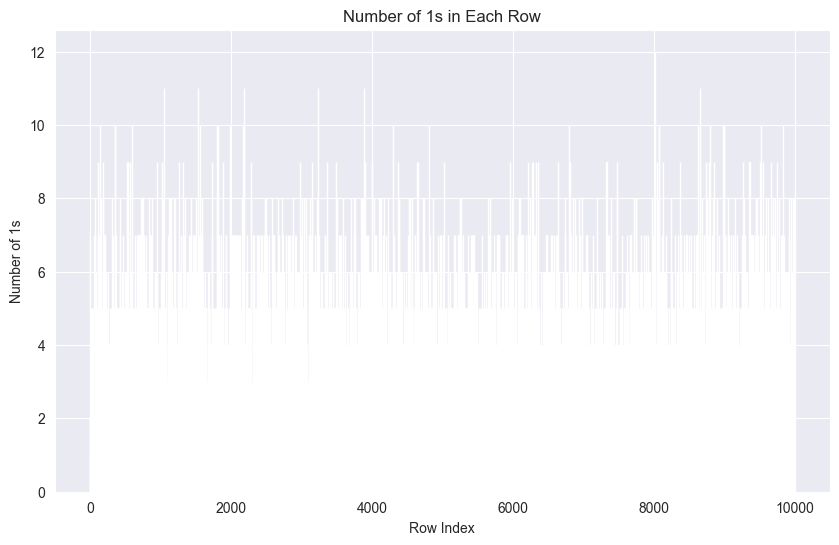

1.8487788911437826

In [15]:
# Iterate through sample_recipe NER column rows
for index, row in sample_recipe.iterrows():
    ingredients_list = row['NER']
    # Convert the string representation of the list to an actual list if needed
    if isinstance(ingredients_list, str):
        ingredients_list = eval(ingredients_list)
    # Iterate through each value in the ingredients list
    for ingredient in ingredients_list:
        # Check if the ingredient matches any ingredient_name in ingr_mapping_df
        match = ingr_mapping_df[ingr_mapping_df['ingredient_name'] == ingredient]
        if not match.empty:
            ingredient_id = match['ingredient_id'].values[0]
            # Update the corresponding cell to 1
            sample_recipe.at[index, str(ingredient_id)] = 1

# Verify the result
print(sample_recipe.head())
# Identify columns that are compound IDs
ingredient_id_cols = [col for col in sample_recipe.columns if col not in ['id', 'NER']]

# Calculate the number of 1s in each row
sample_recipe['count_ones'] = sample_recipe[ingredient_id_cols].sum(axis=1)

# Plot the number of 1s in each row
plt.figure(figsize=(10, 6))
plt.bar(sample_recipe.index, sample_recipe['count_ones'])
plt.xlabel('Row Index')
plt.ylabel('Number of 1s')
plt.title('Number of 1s in Each Row')
plt.show()

sample_recipe.count_ones.mean()
sample_recipe.count_ones.max()
sample_recipe.count_ones.std()

In [16]:
# Initialize a list to store unmatched ingredients
unmatched_ingredients = []

# Iterate through sample_recipe NER column rows
for index, row in sample_recipe.iterrows():
    ingredients_list = row['NER']
    # Convert the string representation of the list to an actual list if needed
    if isinstance(ingredients_list, str):
        ingredients_list = eval(ingredients_list)
    # Iterate through each value in the ingredients list
    for ingredient in ingredients_list:
        # Check if the ingredient matches any ingredient_name in ingr_mapping_df
        match = ingr_mapping_df[ingr_mapping_df['ingredient_name'] == ingredient]
        if not match.empty:
            ingredient_id = match['ingredient_id'].values[0]
            # Update the corresponding cell to 1
            sample_recipe.at[index, str(ingredient_id)] = 1
        else:
            # If no match, add the ingredient to the unmatched_ingredients list
            unmatched_ingredients.append(ingredient)

In [17]:
unmatched_ingredients = pd.Series(unmatched_ingredients)

unmatched_ingredients.nunique()

6383

In [19]:
unmatched_list_unique = unmatched_ingredients.unique()

In [22]:
unmatched_list_unique = pd.Series(unmatched_list_unique)

In [23]:
unmatched_list_unique.info()

<class 'pandas.core.series.Series'>
RangeIndex: 6383 entries, 0 to 6382
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
6383 non-null   object
dtypes: object(1)
memory usage: 50.0+ KB


In [24]:
unmatched_list_unique.head(100)

0      flank_steak
1     green_onions
2        salad_oil
3     sesame_seeds
4      brown_sugar
          ...     
95     baking_soda
96     white_sugar
97            eggs
98               s
99     green_onion
Length: 100, dtype: object